In [1]:
import pandas as pd 
import numpy as np
import random

# Simulate a league with perfect competion
Perfect competition assumes a 50% chance of any team winning a game and no draws


In [2]:
# Create a league of 20 teams to simulate: Prem, laLiga, SerieA and Ligue1
league20 = np.arange(1,21,1)

# Create a league of 18 teams to simulate: Boundesliga & Eredivisie
league18 = np.arange(1,19,1)

games20 = list(np.arange(1,39,1))
games18 = list(np.arange(1,37,1))

# Create an empty dictionary, each key is the team number
league_tally20 =  dict.fromkeys(league20, [])  # For leagues with 20 teams
league_tally18 =  dict.fromkeys(league18, [])  # For leagues with 18 teams

In [3]:
# Model results of 50/50 win only does one side (Home or Away)

def generate_results(league_tally, league, games):
    
    for key in league_tally:   # Cycle through each team in the league 
        points_tally = [] 
        for game in games:     # For each team cycle through all the games they play in a season
            rnd = random.uniform(0, 1)  # Teams have 50/50 chance of loss or win  
            
            if rnd < .5:
                points = 3     # Teams get 3 points for a win
            else:
                points = 0     # Teams get 0 points for a loss 
            
            points_tally.append(points)

        league_tally[key] = points_tally  # Add points to league tally
    return league_tally
 

In [4]:
# Simulate for league with 20 teams
# Loop over 11 seasons
seasons = np.arange(1,11,1)

# Set initial season for merge
results = pd.DataFrame(generate_results(league_tally20, league20, games20))
season_x = pd.DataFrame(results.sum())
season_x

# Merge tables across all seasons
for season in seasons:
    results = pd.DataFrame(generate_results(league_tally20, league20, games20))
    season_y = pd.DataFrame(results.sum(), columns=[season])
    season_x = pd.concat([season_x, season_y], axis=1)


Perfect_Competition20 = season_x
Perfect_Competition20

,0,1,2,3,4,5,6,7,8,9,10
1,66,45,63,51,51,48,48,51,48,66,48
2,57,54,54,48,66,57,54,57,57,57,66
3,45,51,66,66,48,51,66,45,63,33,54
4,51,45,69,63,54,51,42,54,48,63,42
5,48,45,60,63,54,48,60,42,48,54,66
6,45,57,69,60,42,36,51,45,48,57,51
7,51,54,54,72,42,60,51,75,60,63,57
8,51,48,66,63,45,60,72,69,42,57,51
9,51,54,66,60,54,51,54,66,63,48,60
10,48,51,54,63,60,51,54,54,51,39,57


In [5]:
# Simulate for leagues with 18 teams
seasons = np.arange(1,11,1)

# Set initial season for merge
results = pd.DataFrame(generate_results(league_tally18, league18, games18))
season_x = pd.DataFrame(results.sum())
season_x

# Merge tables across all seasons
for season in seasons:
    results = pd.DataFrame(generate_results(league_tally18, league18, games18))
    season_y = pd.DataFrame(results.sum(), columns=[season])
    season_x = pd.concat([season_x, season_y], axis=1)


Perfect_Competition18 = season_x
Perfect_Competition18

,0,1,2,3,4,5,6,7,8,9,10
1,39,33,63,48,69,60,54,54,51,57,60
2,57,54,42,57,42,63,57,69,36,51,63
3,60,54,54,54,51,57,54,63,45,48,63
4,42,42,63,57,57,60,57,54,54,84,54
5,57,54,57,60,63,42,36,57,51,54,45
6,60,72,51,69,63,48,48,63,57,66,45
7,57,78,60,45,63,54,54,39,54,51,54
8,51,51,51,54,60,66,54,45,57,51,57
9,39,51,60,57,57,48,57,51,57,54,48
10,45,60,42,57,75,51,48,63,69,45,45


In [6]:
perfect_league20 = Perfect_Competition20.T
perfect_league18 = Perfect_Competition18.T

# Analyse actual European league results 

In [33]:
# DEFINE FUNCTION TO READ FILES FROM GITHUB REPOS
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df

# Read in data for leagues
premier_league = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Premier_League.csv")
la_liga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/LA_Liga.csv")
Bundesliga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Bundesliga.csv")
SerieA = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/SerieA.csv")
Ligue1 = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Ligue1.csv")
Eredivisie = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Eredivisie.csv")


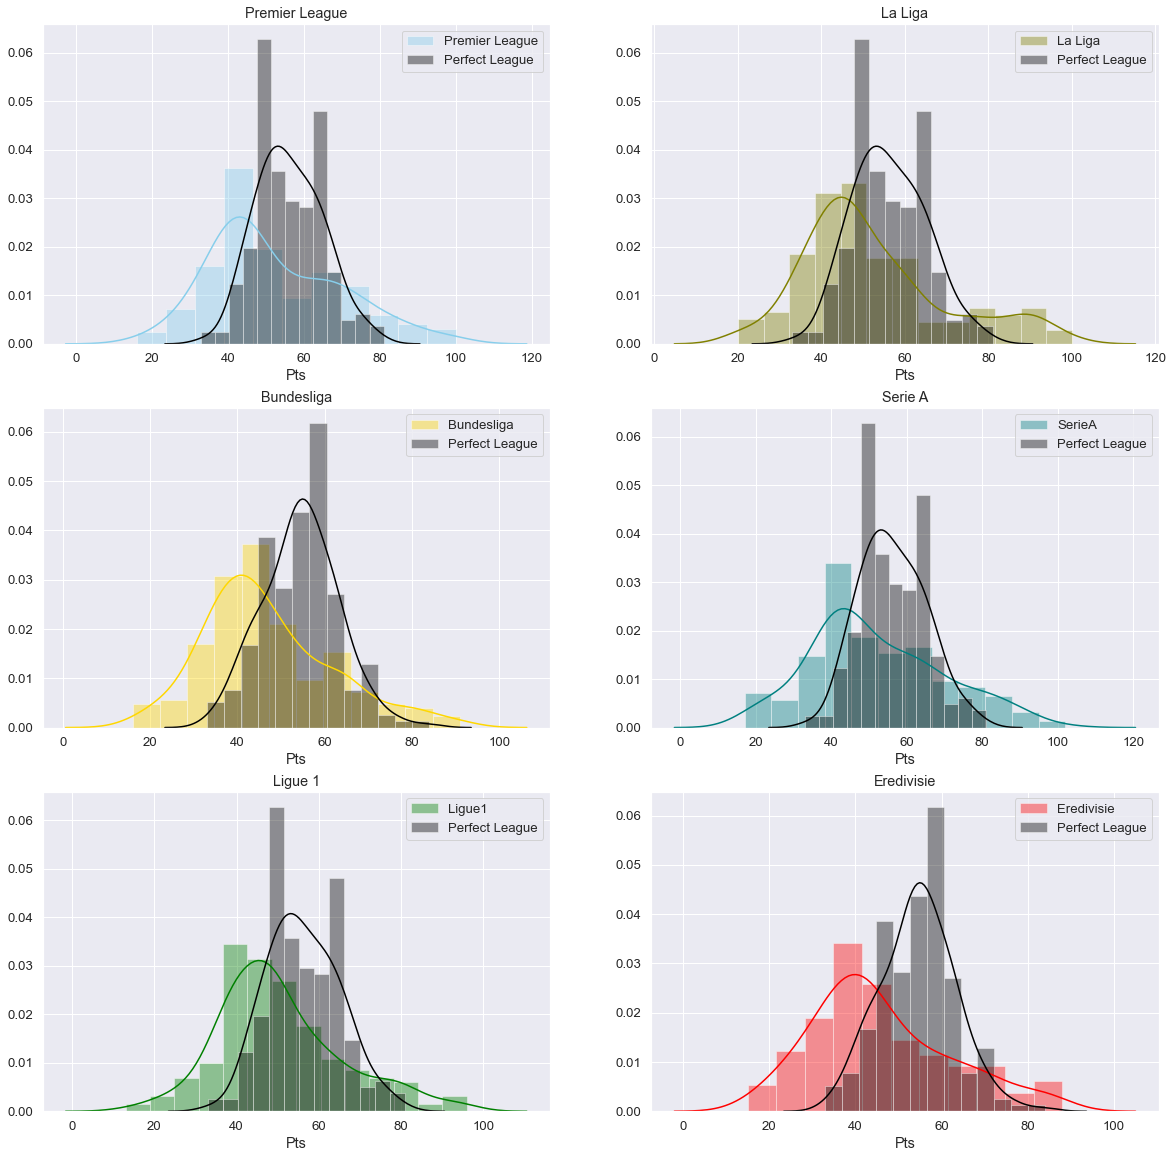

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(font_scale=1.2) 
df = sns.load_dataset("iris")

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

ax = sns.distplot(premier_league.Pts, kde=True, color="skyblue", ax=axs[0, 0], label="Premier League")
ax.set_title('Premier League')
ax = sns.distplot(la_liga.Pts, kde=True, color="olive", ax=axs[0, 1], label="La Liga")
ax.set_title('La Liga')
ax = sns.distplot(Bundesliga.Pts, kde=True, color="gold", ax=axs[1, 0], label="Bundesliga")
ax.set_title('Bundesliga')
ax = sns.distplot(SerieA.Pts, kde=True, color="teal", ax=axs[1, 1], label="SerieA")
ax.set_title('Serie A')
ax = sns.distplot(Ligue1.Pts, kde=True, color="green", ax=axs[-1, 0], label="Ligue1")
ax.set_title('Ligue 1')
ax = sns.distplot(Eredivisie.Pts, kde=True, color="red", ax=axs[-1, 1], label="Eredivisie")
ax.set_title('Eredivisie')
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[1, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[-1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[-1, 1], label="Perfect League")
ax.legend()
plt.savefig('football_league.png', dpi=200)
plt.show()

# Statistical Analysis 

## Perform a Kolmogorov-Smirnov test 
We will set up a hypothesis test 
h0 There is no difference between the perfect league and league x
h1 There is a difference between the perfect league and 

In [35]:
from scipy.stats import ks_2samp

# Flatten our perfect league 
flat20 = perfect_league20.to_numpy().flatten()
flat18 = perfect_league18.to_numpy().flatten()

print("Premier League", ks_2samp(premier_league.Pts, flat20))
print("la liga", ks_2samp(la_liga.Pts, flat20))
print("Bundesliga", ks_2samp(Bundesliga.Pts, flat18))
print("Serie A", ks_2samp(SerieA.Pts, flat20))
print("Ligue 1", ks_2samp(Ligue1.Pts, flat20))
print("Eredivisie", ks_2samp(Eredivisie.Pts, flat18))

Premier League KstestResult(statistic=0.38181818181818183, pvalue=1.1125227132299648e-14)
la liga KstestResult(statistic=0.35909090909090907, pvalue=5.387139100255126e-13)
Bundesliga KstestResult(statistic=0.41414141414141414, pvalue=1.3799117536790615e-15)
Serie A KstestResult(statistic=0.35454545454545455, pvalue=1.1343342189973822e-12)
Ligue 1 KstestResult(statistic=0.37272727272727274, pvalue=5.4203264657272044e-14)
Eredivisie KstestResult(statistic=0.4444444444444444, pvalue=5.678849284866504e-18)
